In [ ]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import cv2
from keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
import keras
from keras.layers import Conv2D,Activation,MaxPooling2D
#import keras_utils
from keras.layers import Concatenate
from keras import Input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras import models
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix,  plot_confusion_matrix,  ConfusionMatrixDisplay
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
data_path='/content/drive/MyDrive/covid-end'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
 
label_dict=dict(zip(categories,labels)) #empty dictionary
 
print(label_dict)
print(categories)
print(labels)

In [ ]:
data1 = np.load('/content/drive/MyDrive/covid-end/data.npy')
target1 = np.load('/content/drive/MyDrive/covid-end/target.npy')

In [ ]:
data=np.load('/content/drive/MyDrive/data/data1.npy')
target=np.load('/content/drive/MyDrive/data/target1.npy')
print(data.shape)
print(target.shape)

(21759, 100, 100, 1)
(21759, 2)


In [ ]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [ ]:
input_shape=data.shape[1:] #50,50,1
inp=Input(shape=input_shape)
print(input_shape,inp)

(100, 100, 1) KerasTensor(type_spec=TensorSpec(shape=(None, 100, 100, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [ ]:
base_model = VGG16(input_shape = (100, 100, 1), # Shape of our images
include_top = False
,weights = None)#imagnet

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)
 
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
 
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)
 
# Add a final sigmoid layer for classification
x = layers.Dense(2, activation='sigmoid')(x)
 
model = tf.keras.models.Model(base_model.input, x)
 
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
 # Checkpoint
filepath="/content/drive/MyDrive/data/vgg16-10.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=10,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/10
436/436 [==============================] - 1685s 4s/step - loss: 0.4850 - acc: 0.8114 - val_loss: 0.3663 - val_acc: 0.8610

Epoch 00001: val_acc improved from -inf to 0.86100, saving model to /content/drive/MyDrive/data/vgg16-10.hdf5
Epoch 2/10
436/436 [==============================] - 1681s 4s/step - loss: 0.3496 - acc: 0.8645 - val_loss: 0.3216 - val_acc: 0.8765

Epoch 00002: val_acc improved from 0.86100 to 0.87651, saving model to /content/drive/MyDrive/data/vgg16-10.hdf5
Epoch 3/10
436/436 [==============================] - 1683s 4s/step - loss: 0.3206 - acc: 0.8749 - val_loss: 0.3281 - val_acc: 0.8613

Epoch 00003: val_acc did not improve from 0.87651
Epoch 4/10
436/436 [==============================] - 1683s 4s/step - loss: 0.3008 - acc: 0.8826 - val_loss: 0.3189 - val_acc: 0.8647

Epoch 00004: val_acc did not improve from 0.87651
Epoch 5/10
436/436 [==============================] - 1688s 4s/step - loss: 0.2818 - acc: 0.8894 - val_loss: 0.2776 - val_acc: 0.8868

Ep

In [ ]:
new_model = load_model("/content/drive/MyDrive/vgg/vgg16-95.hdf5")

In [ ]:
filepath="/content/drive/MyDrive/vgg/vgg16-105.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
history=new_model.fit(train_data,train_target,epochs=10,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/10
436/436 [==============================] - 1672s 4s/step - loss: 0.1021 - acc: 0.9614 - val_loss: 0.0775 - val_acc: 0.9719

Epoch 00001: val_acc improved from -inf to 0.97186, saving model to /content/drive/MyDrive/vgg/vgg16-105.hdf5
Epoch 2/10
436/436 [==============================] - 1658s 4s/step - loss: 0.1007 - acc: 0.9631 - val_loss: 0.0782 - val_acc: 0.9713

Epoch 00002: val_acc did not improve from 0.97186
Epoch 3/10
436/436 [==============================] - 1656s 4s/step - loss: 0.1029 - acc: 0.9614 - val_loss: 0.0918 - val_acc: 0.9678

Epoch 00003: val_acc did not improve from 0.97186
Epoch 4/10
436/436 [==============================] - 1656s 4s/step - loss: 0.1025 - acc: 0.9623 - val_loss: 0.0789 - val_acc: 0.9707

Epoch 00004: val_acc did not improve from 0.97186
Epoch 5/10
436/436 [==============================] - 1657s 4s/step - loss: 0.1026 - acc: 0.9638 - val_loss: 0.0806 - val_acc: 0.9696

Epoch 00005: val_acc did not improve from 0.97186
Epoch 6/10
436/

In [ ]:
new_model.save("/content/drive/MyDrive/vgg/vgg16-95.hdf5")
print("Saved model to disk")

Saved model to disk


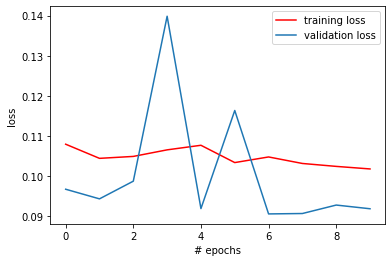

In [ ]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

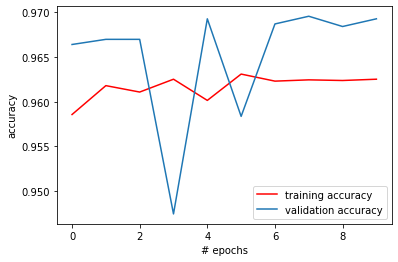

In [ ]:
plt.plot(history.history['acc'],'r',label='training accuracy')
plt.plot(history.history['val_acc'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
Y_pred = new_model.predict_generator(test_data) 
y_pred = np.argmax(Y_pred,  axis =1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
0.0
4352
4352
[[1913  196]
 [  52 2191]]
Classification_Report
 
1.0
4352
4352
[[1939  144]
 [  93 2176]]
 
 
 1.0
4352
4352
[[1858  271]
 [  15 2208]]
 
 
4352
4352
[[2071   63]
 [ 100 2118]]
Classification_Report
 
 
 
 
0.0
4352
4352
[[1997   77]
 [  59 2219]]
Classification_Report
 
 
 
0.0
4352
4352
[[1963  152]
 [  25 2212]]
Classification_Report
 
 
1.0
4352
4352
[[1993  103]
 [  33 2223]]






1.0
4352
4352
[[1978  100]
 [  43 2231]]
Classification_Report

SyntaxError: ignored

1.0
4352
4352
[[1978  100]
 [  43 2231]]
Classification_Report
              precision    recall  f1-score   support

         neg       0.98      0.95      0.97      2078
         pos       0.96      0.98      0.97      2274

    accuracy                           0.97      4352
   macro avg       0.97      0.97      0.97      4352
weighted avg       0.97      0.97      0.97      4352



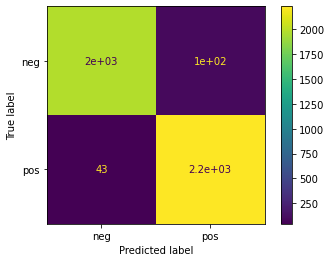

In [ ]:
 #print(type(y_pred))
true_lables=[]
target_names = ['neg', 'pos']
label_names = [0 , 1]
print(test_target[0][0])
print(len(test_target))
for item in range(len(test_target)):
  true_lables.append(test_target[item][1])
print(len(true_lables))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_lables,  y_pred,  labels = label_names) 
 
# print ('Confusion Matrix') 
print(confusion_matrix(true_lables,  y_pred))
 
print('Classification_Report') 
print(classification_report(true_lables,  y_pred, target_names = target_names)) 
 
disp = ConfusionMatrixDisplay(confusion_matrix = cm,  display_labels = target_names)
disk = disp.plot() 
plt.show()